# Practical Statistics for Data Scientists (Python)
# Chapter 2. Data and Sampling Distributions
> (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck

Import required Python packages.

In [25]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [26]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [27]:
#P testing to review the syntax to get directory
common.dataDirectory()

PosixPath('/Users/WangFu/GitHub/Statistics-for-DS/data')

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [28]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

### Figure 2.1. Population versus sample

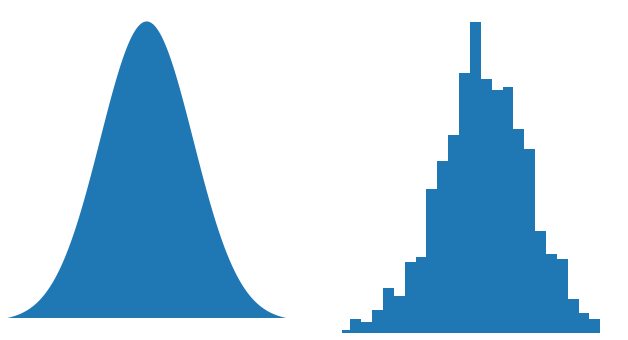

In [29]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(11, 6))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

# Sampling Distribution of a Statistic

In [30]:
loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)
#P note: squeeze -- bool, default False. If the parsed data only contains one column then return a Series. -> if I check type(loans_income), it returns the pandas.core.series.Series, not a data frame

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
40292   63000.0  Data
38959   92000.0  Data
17361  134000.0  Data
33996   52000.0  Data
26491   43000.0  Data


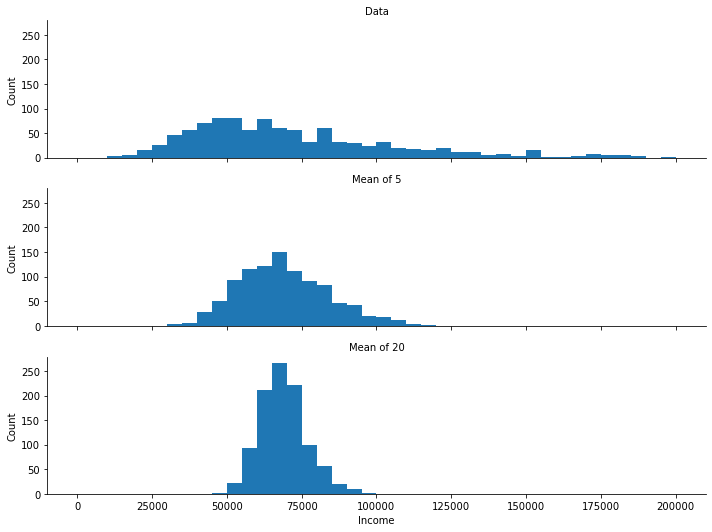

In [31]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2.5, aspect=4)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

# The Bootstrap

The major Python packages don’t provide implementations of the bootstrap approach. It can be implemented using the scikit-learn method resample:

In [32]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -82.09799999999814
std. error: 228.73933106830748


# Confidence Intervals

Confidence intervals always come with a coverage level, expressed as a (high) percentage, say 90% or 95%. One way to think of a 90% confidence interval is as follows: it is the interval that encloses the central 90% of the bootstrap sampling distribution of a sample statistic (see “The Bootstrap” on page 61). More generally, an x% confidence interval around a sample estimate should, on average, contain similar sample estimates x% of the time (when a similar sampling procedure is followed).

Given a sample of size n, and a sample statistic of interest, the algorithm for a bootstrap confidence interval is as follows:
1. Draw a random sample of size n with replacement from the data (a resample).
2. Record the statistic of interest for the resample.
3. Repeat steps 1–2 many (R) times.
4. For an x% confidence interval, trim [(100-x) / 2]% of the R resample results from either end of the distribution.
5. The trim points are the endpoints of an x% bootstrap confidence interval.

68760.51844
55734.1


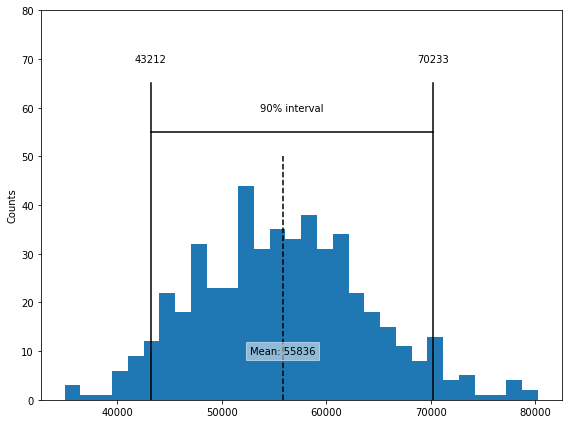

In [33]:
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(8, 6))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

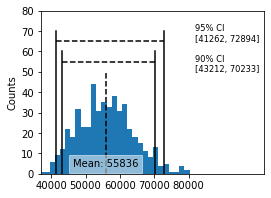

In [34]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

# Normal Distribution
## Standard Normal and QQ-Plots
The package _scipy_ has the function (`scipy.stats.probplot`) to create QQ-plots. The argument `dist` specifies the distribution, which is set by default to the normal distribution.

A QQ-Plot is used to visually determine how close a sample is to a specified distribution—in this case, the normal distribution. The QQ-Plot orders the z-scores from low to high and plots each value’s z-score on the y-axis; the x-axis is the corresponding quantile of a normal distribution for that value’s rank. Since the data is normalized, the units correspond to the number of standard deviations away from the mean. If the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal.

Figure 2-11 shows a QQ-Plot for a sample of 100 values randomly generated from a normal distribution; as expected, the points closely follow the line.

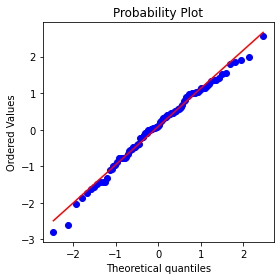

In [35]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
#P note: rvs = random variates
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

# Long-Tailed Distributions

While the normal distribution is often appropriate and useful with respect to the distribution of errors and sample statistics, it typically does not characterize the distribution of raw data. Sometimes, the distribution is highly skewed (asymmetric), such as with income data; or the distribution can be discrete, as with binomial data. Both symmetric and asymmetric distributions may have long tails. The tails of a distribution correspond to the extreme values (small and large). Long tails, and guarding against them, are widely recognized in practical work.

A good example to illustrate the long-tailed nature of data is stock returns.

Figure 2-12 shows the QQ-Plot for the daily stock returns for Netflix (NFLX). 

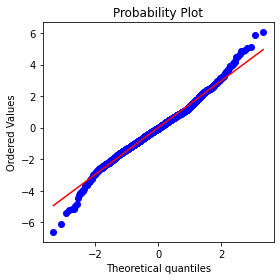

In [36]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))
#P note: not understand why they processed the diff of log (could be the diff is too small to be charted)
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

# Binomial Distribution

The probability of observing `exactly x = 2 successes` in size = 5 trials, where the probability of success for each trial is p = 0.1

In [37]:
print(stats.binom.pmf(2, n=5, p=0.1))
#P note: pmf = Probability mass function.

0.07289999999999992


The probability of observing `2 or fewer successes` in 5 trials, where the probability of success for each trial is 0.1

In [38]:
print(stats.binom.cdf(2, n=5, p=0.1))
#P note: cdf = Cumulative density function.

0.99144


# Poisson and Related Distribution
## Poisson Distributions

The Poisson distribution tells us the distribution of events per unit of time or space when we sample many such units. It is useful when addressing queuing questions such as “How much capacity do we need to be 95% sure of fully processing the internet traffic that arrives on a server in any five second period?”
The key parameter in a Poisson distribution is λ, or lambda. This is the mean number of events that occurs in a specified interval of time or space.

This code will generate 100 random numbers from a Poisson distribution with λ = 2. For example, if incoming customer service calls average two per minute, this code will simulate 100 minutes, returning the number of calls in each of those 100 minutes.

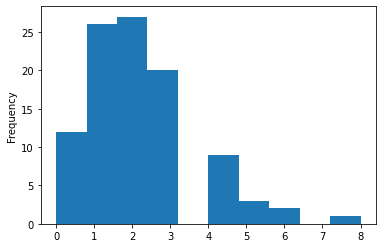

In [39]:
sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()
plt.show()

## Exponential Distribution

Using the same parameter λ that we used in the Poisson distribution, we can also model the distribution of the `time between events`: time between visits to a website or between cars arriving at a toll plaza. It is also used in engineering to model time to failure, and in process management to model, for example, the time required per ser‐ vice call. The  code to generate random numbers from an exponential distribution takes two arguments: n (the quantity of numbers to be generated) and rate (the number of events per time period).

A key assumption in any simulation study for either the Poisson or exponential distribution is that the rate, λ, remains constant over the period being considered.

This code would generate 100 random numbers from an exponential distribution where the mean number of events per time period is 0.2. So you could use it to simulate 100 intervals, in minutes, between service calls, where the average rate of incoming calls is 0.2 per minute.

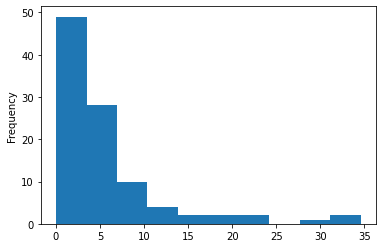

In [40]:
sample = stats.expon.rvs(scale=5, size=100)

pd.Series(sample).plot.hist()
plt.show()

##  Weibull Distribution

If the `event rate changes over the time of the interval`, the exponential (or Poisson) distributions are no longer useful. This is likely to be the case in mechanical failure—the risk of failure increases as time goes by. The Weibull distribution is an extension of the exponential distribution in which the event rate is allowed to change, as specified by a shape parameter, β. If β > 1, the probability of an event increases over time; if β < 1, the probability decreases.

Because the Weibull distribution is used with time-to-failure analysis instead of event rate, the second parameter is expressed in terms of characteristic life, rather than in terms of the rate of events per interval. The symbol used is η, the Greek letter eta. It is also called the scale parameter.

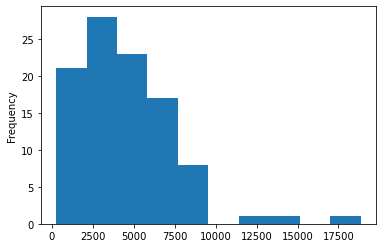

In [41]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()